<a href="https://colab.research.google.com/github/priyanshkedia2/fintech_task/blob/main/Fintech_Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


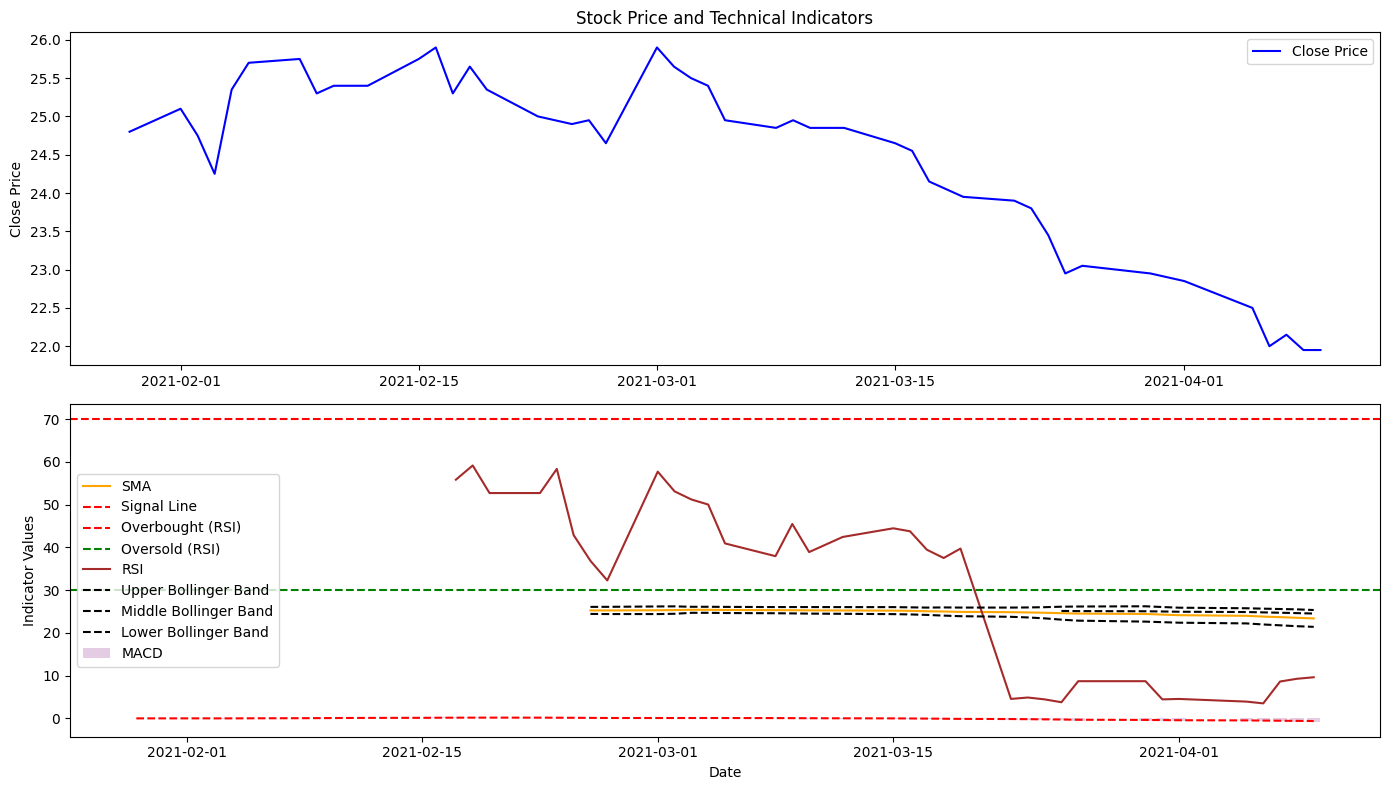

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Calculate Simple Moving Average (SMA)
def calculate_sma(data, column='Close', window=20):
    sma = data[column].rolling(window=window).mean()
    return sma

# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, column='Close', span=20):
    ema = data[column].ewm(span=span, adjust=False).mean()
    return ema

# Calculate Moving Average Convergence Divergence (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = calculate_ema(data, column='Close', span=short_window)
    long_ema = calculate_ema(data, column='Close', span=long_window)
    data['MACD'] = short_ema - long_ema
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, column='Close', window=14):
    price_diff = data[column].diff(1)
    gain = price_diff.where(price_diff > 0, 0)
    loss = -price_diff.where(price_diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, column='Close', window=20):
    data['SMA'] = calculate_sma(data, column=column, window=window)
    data['Upper_Band'] = data['SMA'] + 2 * data[column].rolling(window=window).std()
    data['Middle_Band'] = data['SMA'].rolling(window=window).mean()
    data['Lower_Band'] = data['SMA'] - 2 * data[column].rolling(window=window).std()

# Plot indicators
def plot_indicators(data):
    plt.figure(figsize=(14, 8))

    # Plotting Close Prices
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title('Stock Price and Technical Indicators')
    plt.ylabel('Close Price')
    plt.legend()

    # Plotting Technical Indicators
    plt.subplot(2, 1, 2)
    plt.plot(data['SMA'], label='SMA', color='orange')
    plt.bar(data.index, data['MACD'], label='MACD', color='purple', alpha=0.2)
    plt.plot(data['Signal_Line'], label='Signal Line', color='red', linestyle='dashed')
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought (RSI)')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold (RSI)')
    plt.plot(data['RSI'], label='RSI', color='brown')
    plt.plot(data['Upper_Band'], label='Upper Bollinger Band', color='black', linestyle='dashed')
    plt.plot(data['Middle_Band'], label='Middle Bollinger Band', color='black', linestyle='dashed')
    plt.plot(data['Lower_Band'], label='Lower Bollinger Band', color='black', linestyle='dashed')

    plt.xlabel('Date')
    plt.ylabel('Indicator Values')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
ticker_symbol = 'IRFC.NS'
start_date = '2015-05-09'
end_date = '2021-04-11'

stock_data = get_stock_data(ticker_symbol, start_date, end_date)
calculate_sma(stock_data, window=20)
calculate_ema(stock_data, span=20)
calculate_macd(stock_data, short_window=12, long_window=26, signal_window=9)
calculate_rsi(stock_data, window=14)
calculate_bollinger_bands(stock_data, window=20)

plot_indicators(stock_data)